## Imports

In [1]:
import os

import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style='darkgrid', context='talk', palette='rainbow')

## Data Loading

In [3]:
data_path = './dataset/AusApparalSales4thQrt2020.csv'

def load_data(data_path: str) -> DataFrame:
    df = pd.read_csv(data_path)
    return df

df = load_data(data_path)
print(f'data Shape {df.shape}')
df.head(5)

data Shape (7560, 6)


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


# Data Wrangling

#### a. Ensure that the data is clean and free from any missing or incorrect entries.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [5]:
print(f'Date cols unique values -- {df["Date"].nunique()}')
print(f'Time cols unique values -- {df["Time"].nunique()}')

print(f'State cols unique values -- {df["State"].unique()}')
print(f'Group cols unique values -- {df["Group"].unique()}')
print(f'Group cols unique values -- {df["Unit"].unique()}')

Date cols unique values -- 90
Time cols unique values -- 3
State cols unique values -- [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
Group cols unique values -- [' Kids' ' Men' ' Women' ' Seniors']
Group cols unique values -- [ 8  4 15  3 10 11 13  5  6  9 14 12 16 28 21 29 22 32 49 36 34 26 31 27
 43 50 44 20 18 19 39 17 23 40 30  7 33 42 46 48 37 25 35 45 47 38 41 24
  2 51 63 62 52 56 59 64 53 61 54 60 55 65 57 58]


<Axes: xlabel='Group', ylabel='count'>

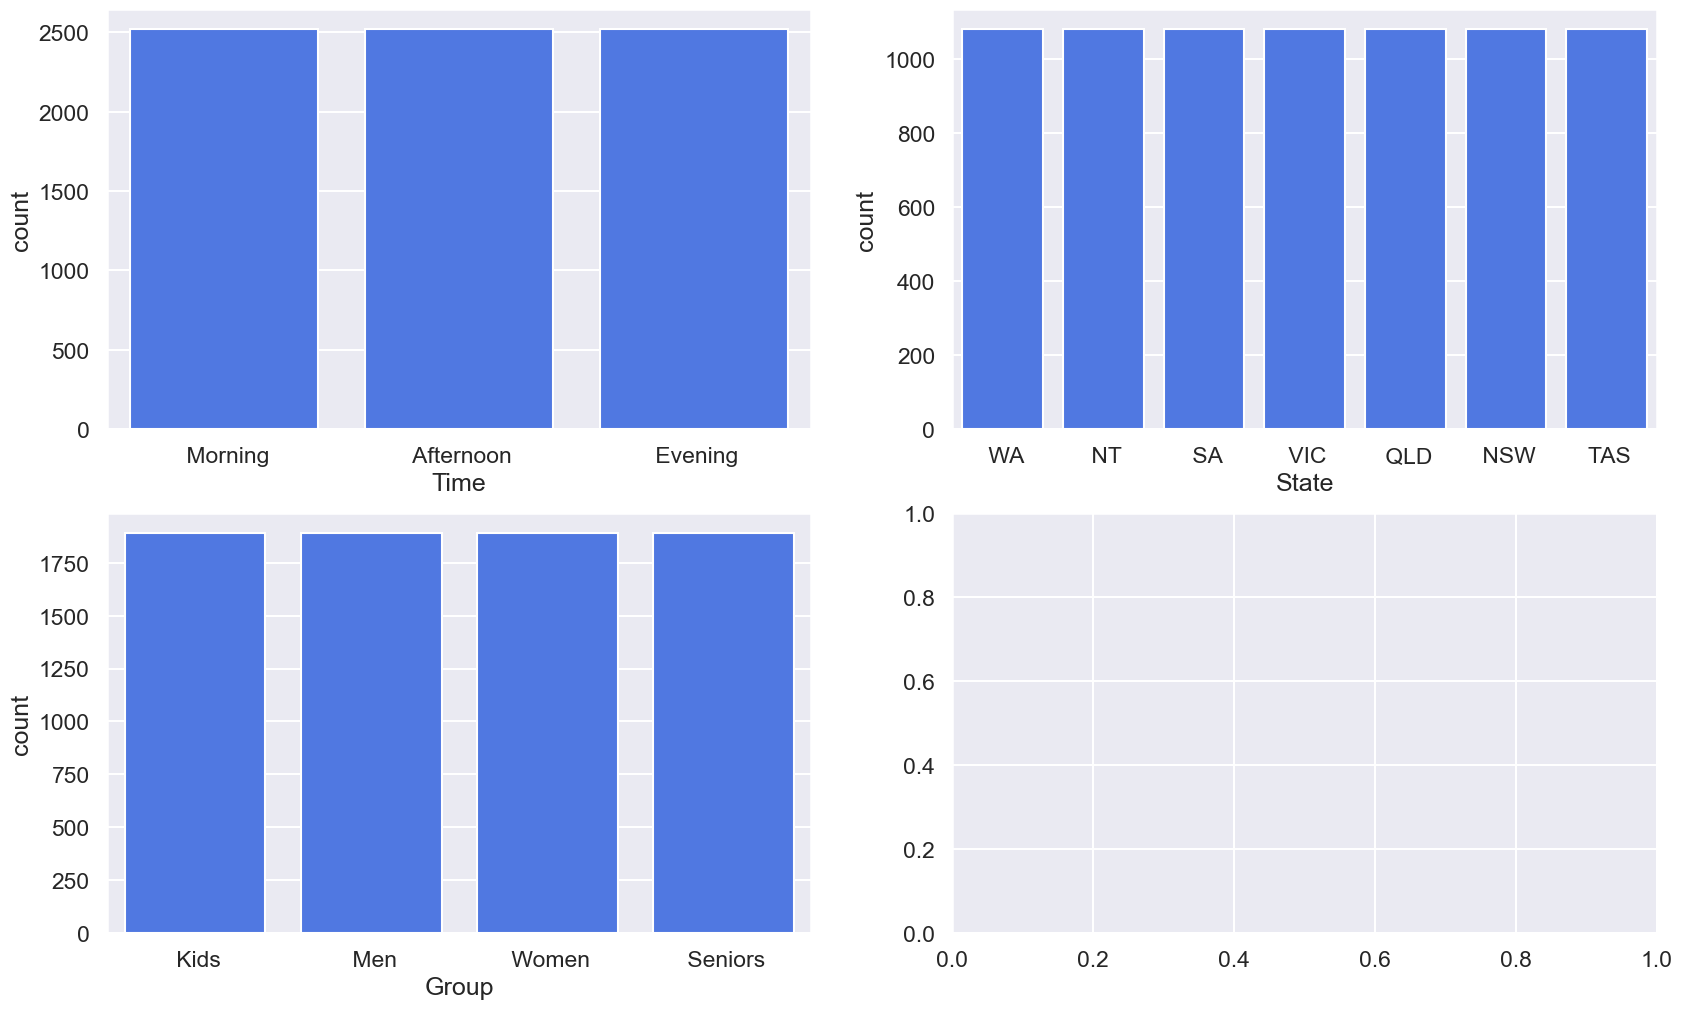

In [6]:
fig, (axs1,axs2) = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))


sns.countplot(df, x="Time", ax=axs1[0])
sns.countplot(df, x="State", ax=axs1[1])
sns.countplot(df, x="Group", ax=axs2[0])


#### Checking Null Counts
#### b. Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).

In [7]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

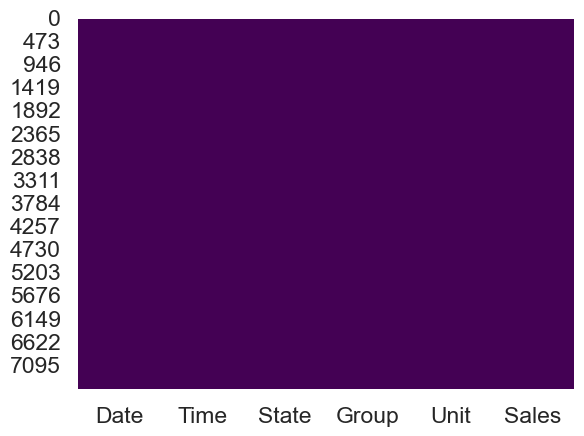

In [8]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

## Actions - 1
* Time, State, Group column needs to be cleanned , [Remove Empty Space Around values]
* We will be cast the type of the Time, State, Group, column to Categorical, and Date to datetime, It will Reduce the Memory Usage, Hence End to end to analysis will be smooth

In [9]:
df['Time'] = df['Time'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df['State'] = df['State'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df['Group'] = df['Group'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = df['Time'].astype('category')
df['State'] = df['State'].astype('category')
df['Group'] = df['Group'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   category      
 2   State   7560 non-null   category      
 3   Group   7560 non-null   category      
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: category(3), datetime64[ns](1), int64(2)
memory usage: 200.1 KB


In [12]:
df.head(5)

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


### Pipelines
The below code is not at all standard:
```
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = df['Time'].astype('category')
df['State'] = df['State'].astype('category')
df['Group'] = df['Group'].astype('category')
```
If I had to replicate the steps in another bigger sample, I need a better way of applying changes to the data.

And this is where Pandas Pipe comes in. Using a pipeline allows you to chain multiple data transformation steps together, making your code more readable, maintainable, and reusable. Here is how you can use the `pipe` method to achieve the same transformations:

```python
import pandas as pd

def convert_date(df, column):
    df[column] = pd.to_datetime(df[column])
    return df

def convert_to_category(df, column):
    df[column] = df[column].astype('category')
    return df

df = (df.pipe(convert_date, 'Date')
        .pipe(convert_to_category, 'Time')
        .pipe(convert_to_category, 'State')
        .pipe(convert_to_category, 'Group')
        )
```

Above Code Looks Clean and sucessfully Recorded all the steps i performed on data, which is i applied
1. convert_date on Date Column
2. convert_to_category on Time, State, Group Columns

In [13]:
def convert_date(df:DataFrame, column: str) -> DataFrame:
    df[column] = pd.to_datetime(df[column])
    return df

def strip_column(df: DataFrame, column: str) -> DataFrame:
    df[column] = df[column].str.strip()
    return df

def convert_to_category(df: DataFrame, column: str) -> DataFrame:
    df[column] = df[column].astype('category')
    return df

In [14]:
df = (load_data(data_path)
      .pipe(convert_date, 'Date')
      .pipe(strip_column, 'Time')
      .pipe(strip_column, 'State')
      .pipe(strip_column, 'Group')
      .pipe(convert_to_category, 'Time')
      .pipe(convert_to_category, 'State')
      .pipe(convert_to_category, 'Group')
)

print(f'Data Shape {df.shape}')
print(df.info())
df.head(5)

Data Shape (7560, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   category      
 2   State   7560 non-null   category      
 3   Group   7560 non-null   category      
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: category(3), datetime64[ns](1), int64(2)
memory usage: 200.1 KB
None


,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


#### Collect Unique Counts

In [15]:
print(f'Date  cols unique values -- {df["Date"].nunique()}' )
print(f'Time  cols unique values -- {df["Time"].nunique()}' )
print(f'State cols unique values -- {df["State"].nunique()}')
print(f'Group cols unique values -- {df["Group"].nunique()}')


Date  cols unique values -- 90
Time  cols unique values -- 3
State cols unique values -- 7
Group cols unique values -- 4


#### Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis. 

## Remakes - 
Total number of record 7,560 , and if multiply 90 * 3 * 7 * 4 = 7560, Data is prepared Manually . 
So All the datapoints are uniformly distruted over Time , State Group and Date.

Lets Veryfy the fact by Groupby logic
 

In [16]:
grouped_df = df.groupby(['Time', 'State', 'Group'], observed=False).size().reset_index(name='Count')

grouped_df.head()

,Time,State,Group,Count
0,Afternoon,NSW,Kids,90
1,Afternoon,NSW,Men,90
2,Afternoon,NSW,Seniors,90
3,Afternoon,NSW,Women,90
4,Afternoon,NT,Kids,90


## Data analysis
#### Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

In [17]:
df.describe(include=[np.number])

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


## OR 

In [18]:
print(f'Unit Count  - {df.Unit.count().item()}')
print(f'Unit mean   - {df.Unit.mean().item() }') 
print(f'Unit min    - {df.Unit.min().item()}') 
print(f'Unit 25 %   - {df.Unit.quantile(0.25).item() }') 
print(f'Unit median - {df.Unit.median().item() }') 
print(f'Unit 75 %   - {df.Unit.quantile(0.75).item() }')  
print(f'Unit max    - {df.Unit.max().item() }') 

Unit Count  - 7560
Unit mean   - 18.00542328042328
Unit min    - 2
Unit 25 %   - 8.0
Unit median - 14.0
Unit 75 %   - 26.0
Unit max    - 65


<Axes: xlabel='Sales', ylabel='Unit'>

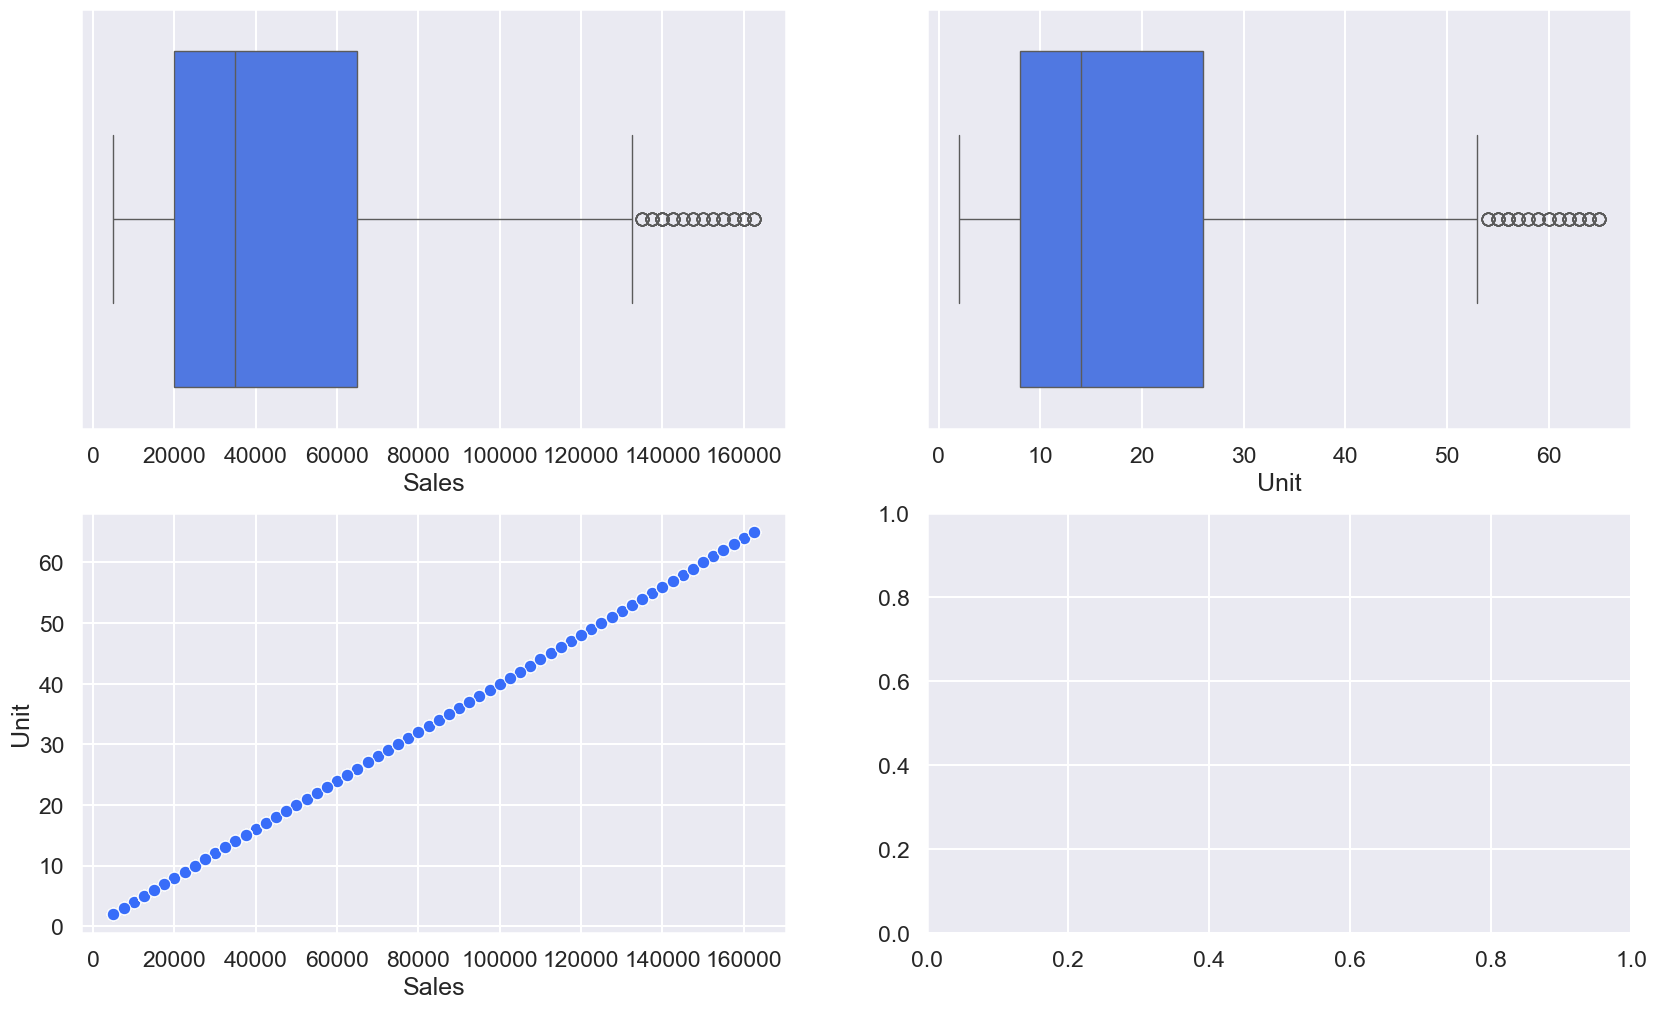

In [19]:
fig, (axs1,axs2) = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))


sns.boxplot(df, x="Sales", ax=axs1[0])
sns.boxplot(df, x="Unit", ax=axs1[1])
sns.scatterplot(df, x="Sales",y="Unit", ax=axs2[0])

## Remarks :
## 1. The sales and Unit both are positevely Skewed .
## 2. The Sales & Unit columns are Positively Corelated [ From Scatter plot ]

### b. Identify the group with the highest sales and the group with the lowest sales based on the data provided.
### c. Identify the group with the highest and lowest sales based on the data provided.


In [20]:
max_sales = df.groupby(['Time', 'State', 'Group']).aggregate({"Sales":'max'}).reset_index().sort_values(['Sales'], ascending=False)
min_sales = df.groupby(['Time', 'State', 'Group']).aggregate({"Sales":'min'}).reset_index().sort_values(['Sales'], ascending=False)

max_sales.head()

C:\Users\rdas6\AppData\Local\Temp\ipykernel_8452\1590639826.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_sales = df.groupby(['Time', 'State', 'Group']).aggregate({"Sales":'max'}).reset_index().sort_values(['Sales'], ascending=False)
C:\Users\rdas6\AppData\Local\Temp\ipykernel_8452\1590639826.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  min_sales = df.groupby(['Time', 'State', 'Group']).aggregate({"Sales":'min'}).reset_index().sort_values(['Sales'], ascending=False)


,Time,State,Group,Sales
51,Evening,VIC,Women,162500
23,Afternoon,VIC,Women,162500
22,Afternoon,VIC,Seniors,162500
20,Afternoon,VIC,Kids,162500
78,Morning,VIC,Seniors,162500


Text(0.5, 1.0, 'Min Sales Across Groups')

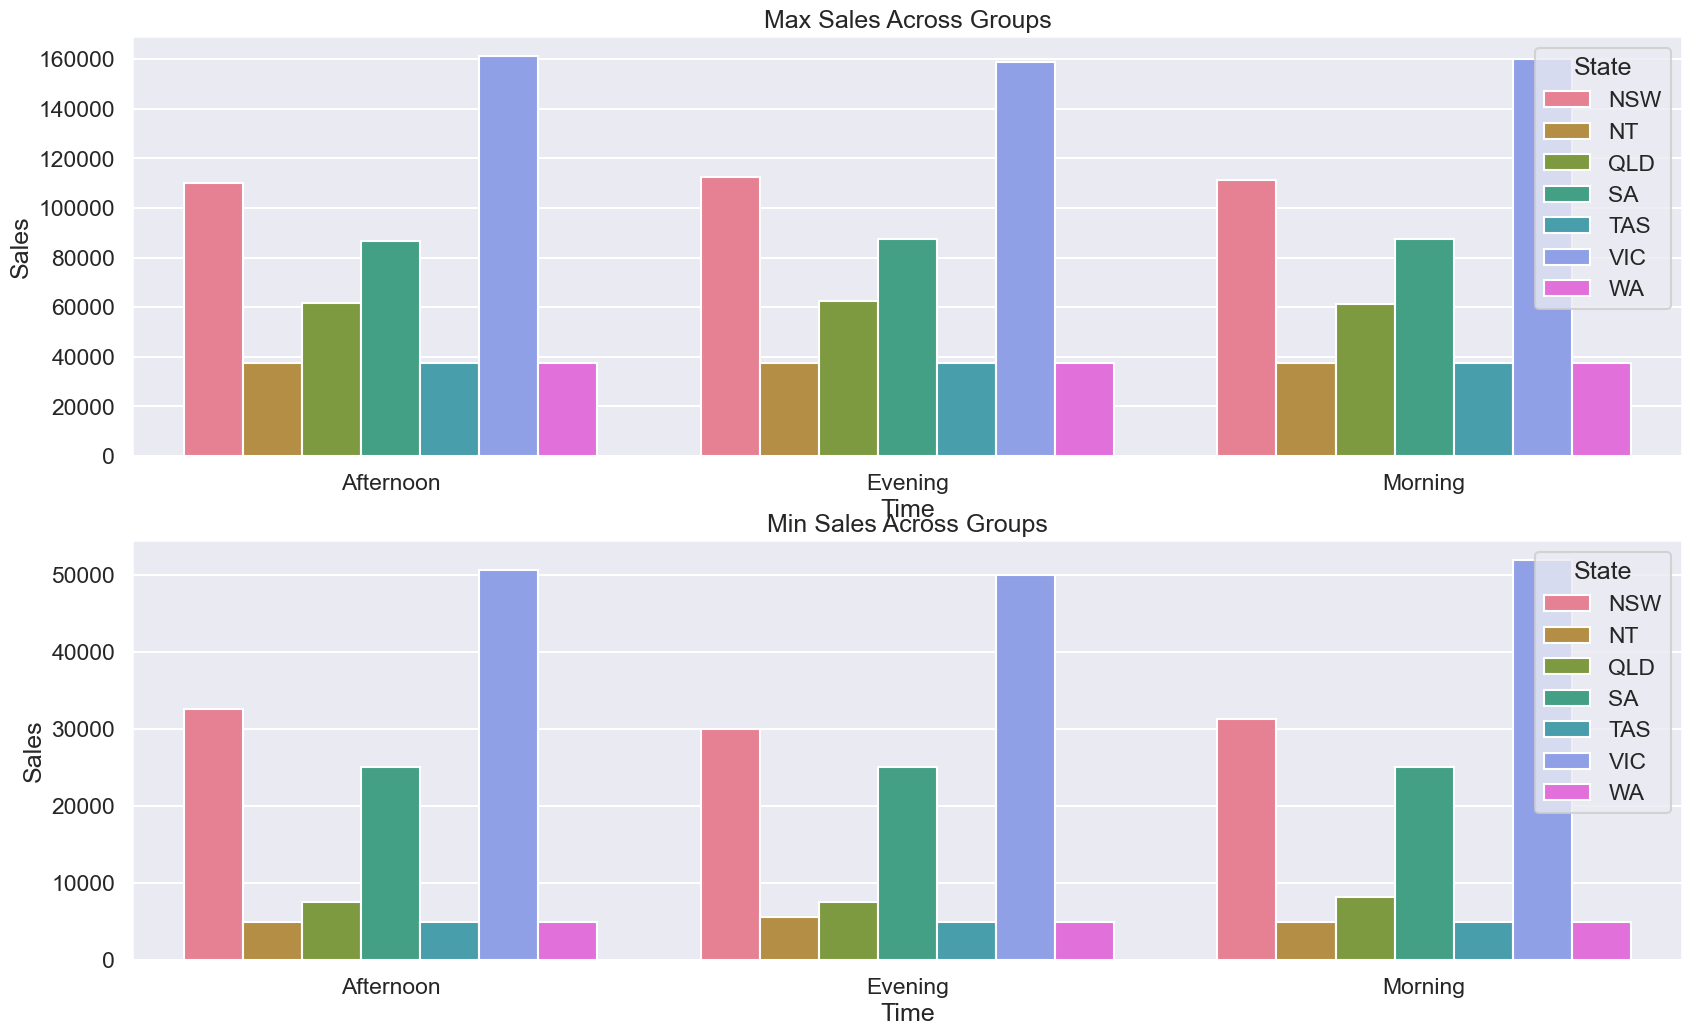

In [21]:
fig, (axs1,axs2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12), squeeze= True)
sns.barplot(max_sales, y="Sales", x="Time", hue='State',  errorbar=None,  ax=axs1)
axs1.set_title("Max Sales Across Groups")

sns.barplot(min_sales, y="Sales", x="Time", hue='State', errorbar=None,  ax=axs2)
axs2.set_title("Min Sales Across Groups")

### d. Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.
#### Create new Column for Month , Week, Quater

In [22]:
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week
df['quarter'] = df['Date'].dt.quarter

df

,Date,Time,State,Group,Unit,Sales,month,week,quarter
0,2020-10-01,Morning,WA,Kids,8,20000,10,40,4
1,2020-10-01,Morning,WA,Men,8,20000,10,40,4
2,2020-10-01,Morning,WA,Women,4,10000,10,40,4
3,2020-10-01,Morning,WA,Seniors,15,37500,10,40,4
4,2020-10-01,Afternoon,WA,Kids,3,7500,10,40,4
...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,12,53,4
7556,2020-12-30,Evening,TAS,Kids,15,37500,12,53,4
7557,2020-12-30,Evening,TAS,Men,15,37500,12,53,4
7558,2020-12-30,Evening,TAS,Women,11,27500,12,53,4


## Unique Month , WEEK, Quater Count

In [23]:
print(f'month cols unique values    -- {df["month"].unique()}')
print(f'week cols unique values    -- {df["week"].unique()}')
print(f'quarter cols unique values -- {df["quarter"].unique()}')

month cols unique values    -- [10 11 12]
week cols unique values    -- <IntegerArray>
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Length: 14, dtype: UInt32
quarter cols unique values -- [4]


## Remarks - Quater Analysis is not needed as entire dataset has only one quater data

### Monthly, Weekly Sales Aggrigation

In [24]:
monthly_sales = df.groupby(['month', 'Time', 'State', 'Group']).aggregate({"Sales":'sum'}).reset_index()
weekly_sales = df.groupby(['week', 'Time', 'State', 'Group']).aggregate({"Sales":'sum'}).reset_index()

monthly_sales.head()

C:\Users\rdas6\AppData\Local\Temp\ipykernel_8452\1688976953.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby(['month', 'Time', 'State', 'Group']).aggregate({"Sales":'sum'}).reset_index()
C:\Users\rdas6\AppData\Local\Temp\ipykernel_8452\1688976953.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_sales = df.groupby(['week', 'Time', 'State', 'Group']).aggregate({"Sales":'sum'}).reset_index()


,month,Time,State,Group,Sales
0,10,Afternoon,NSW,Kids,2002500
1,10,Afternoon,NSW,Men,2050000
2,10,Afternoon,NSW,Seniors,1895000
3,10,Afternoon,NSW,Women,2255000
4,10,Afternoon,NT,Kids,712500


Text(0.5, 1.0, 'weekly_sales')

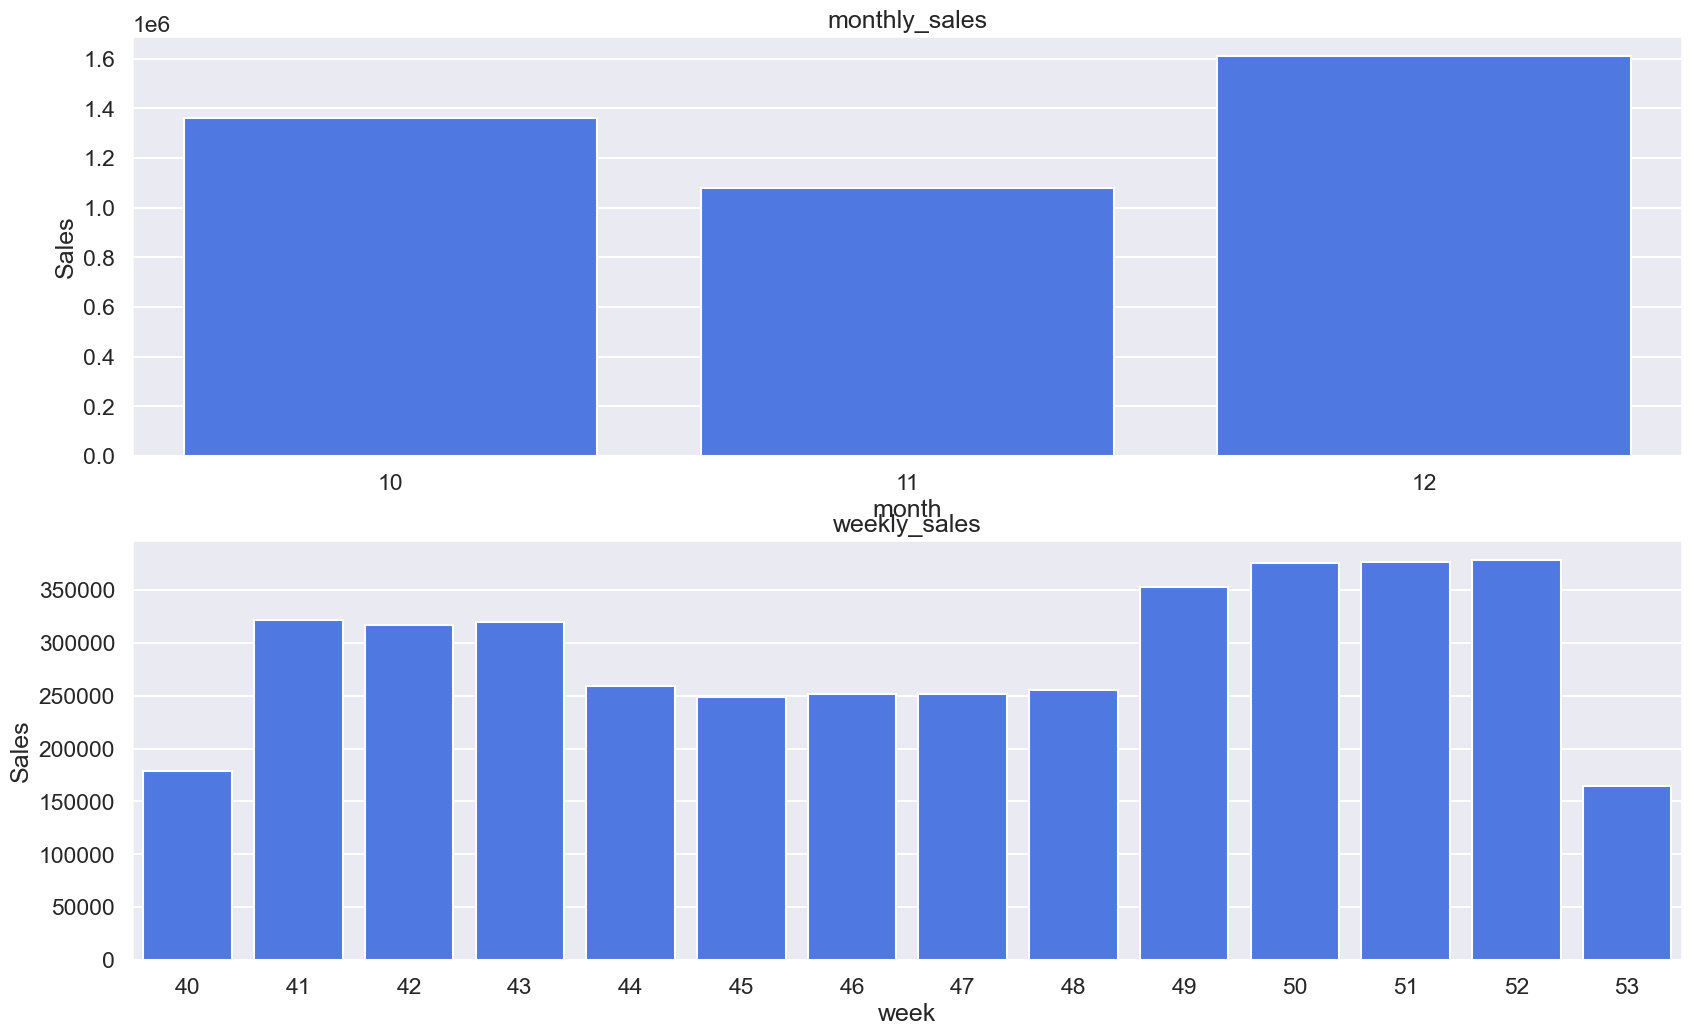

In [25]:
fig, (axs1,axs2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12), squeeze= True)
sns.barplot(monthly_sales, y="Sales", x="month",  errorbar=None, ax=axs1)
axs1.set_title("monthly_sales")

sns.barplot(weekly_sales, y="Sales", x="week",  errorbar=None,   ax=axs2)
axs2.set_title("weekly_sales")

## Month 12 Shows Highest Sales and week 50,51,52 shows highest sales

Text(0.5, 1.0, 'weekly_sales Grouped Time')

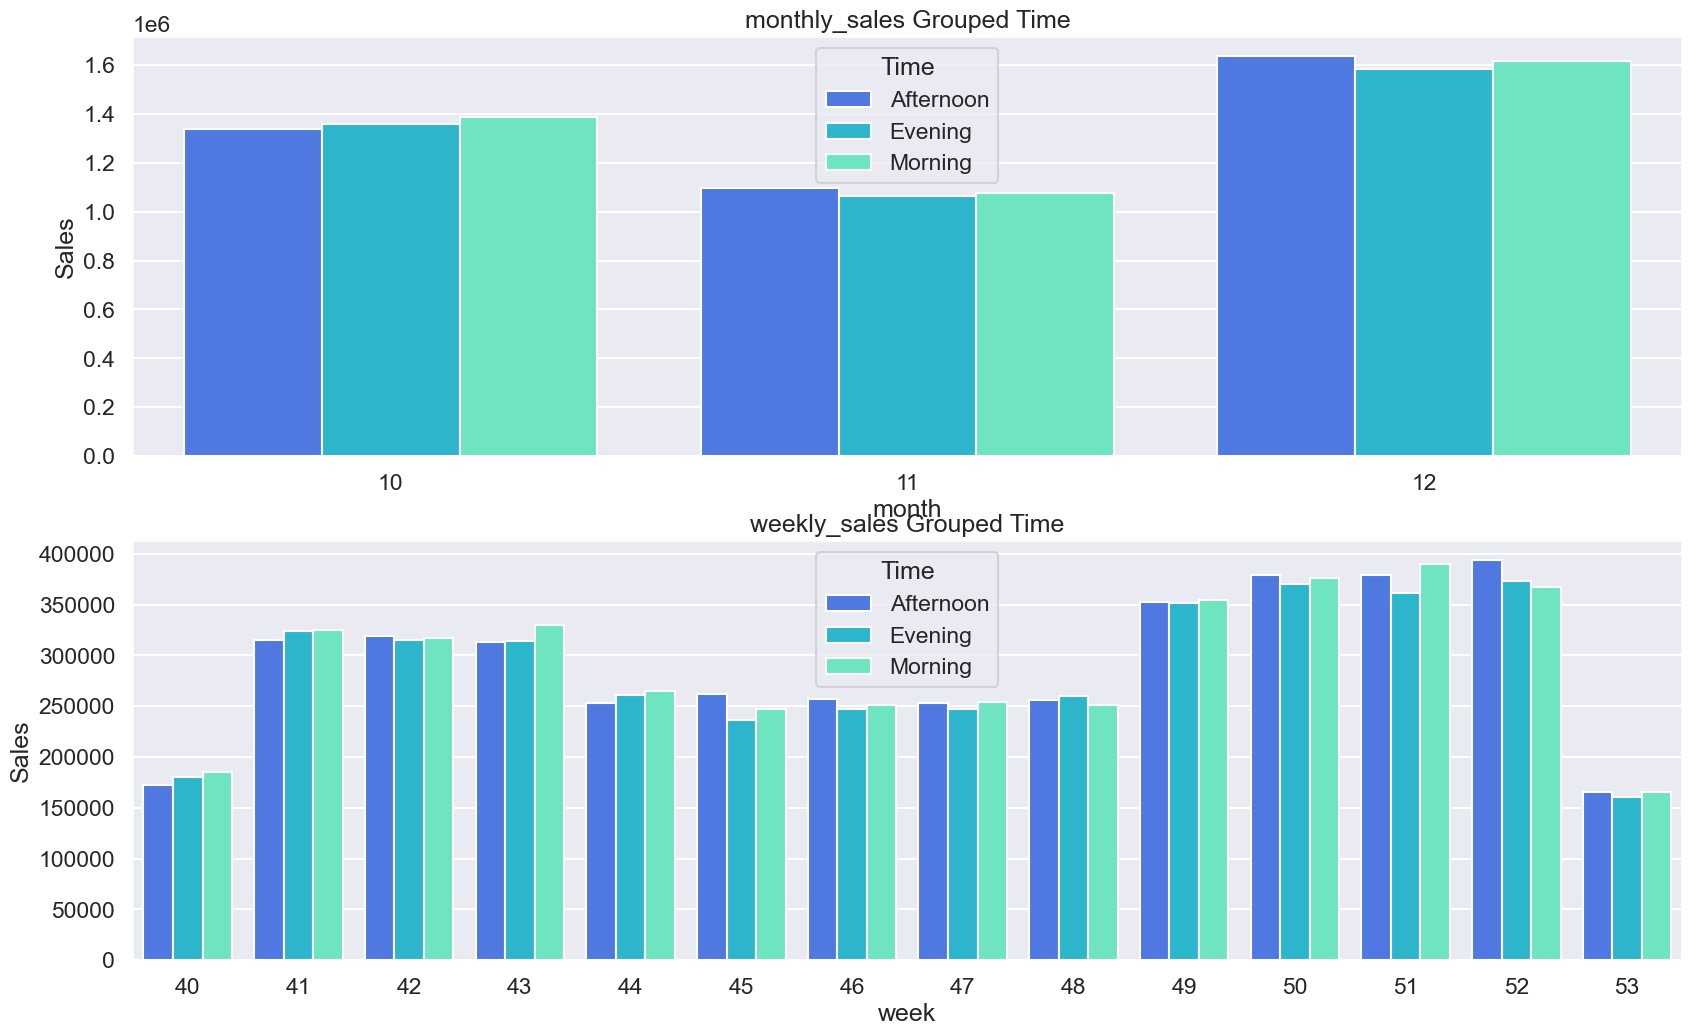

In [26]:
fig, (axs1,axs2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12), squeeze= True)
sns.barplot(monthly_sales, y="Sales", x="month", hue ='Time',  errorbar=None,  ax=axs1)
axs1.set_title("monthly_sales Grouped Time")

sns.barplot(weekly_sales, y="Sales", x="week",hue ='Time',  errorbar=None,   ax=axs2)
axs2.set_title("weekly_sales Grouped Time")

#### All the time slots shows equal numples of slaes

Text(0.5, 1.0, 'weekly_sales Grouped State')

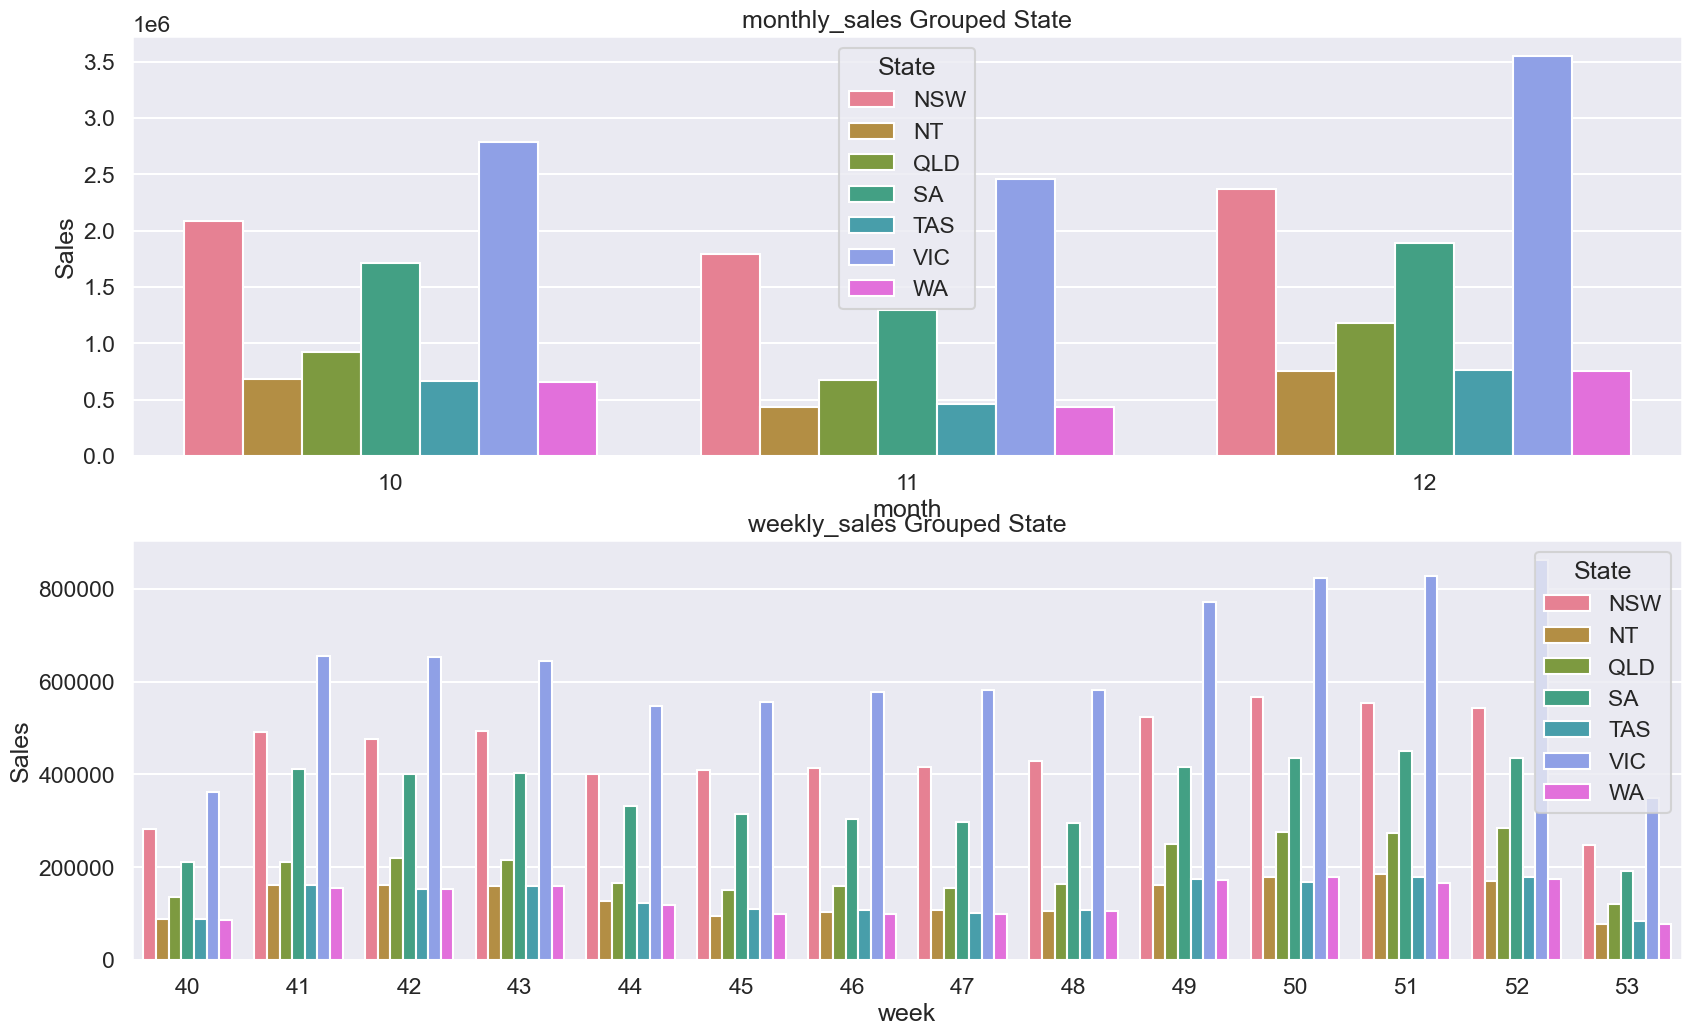

In [27]:
fig, (axs1,axs2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12), squeeze= True)
sns.barplot(monthly_sales, y="Sales", x="month", hue ='State',  errorbar=None,  ax=axs1)
axs1.set_title("monthly_sales Grouped State")

sns.barplot(weekly_sales, y="Sales", x="week",hue ='State',   errorbar=None,  ax=axs2)
axs2.set_title("weekly_sales Grouped State")

###  The State Code "VIC" Shows Higher number os slaes across the months and Weeks

Text(0.5, 1.0, 'weekly_sales Grouped Group')

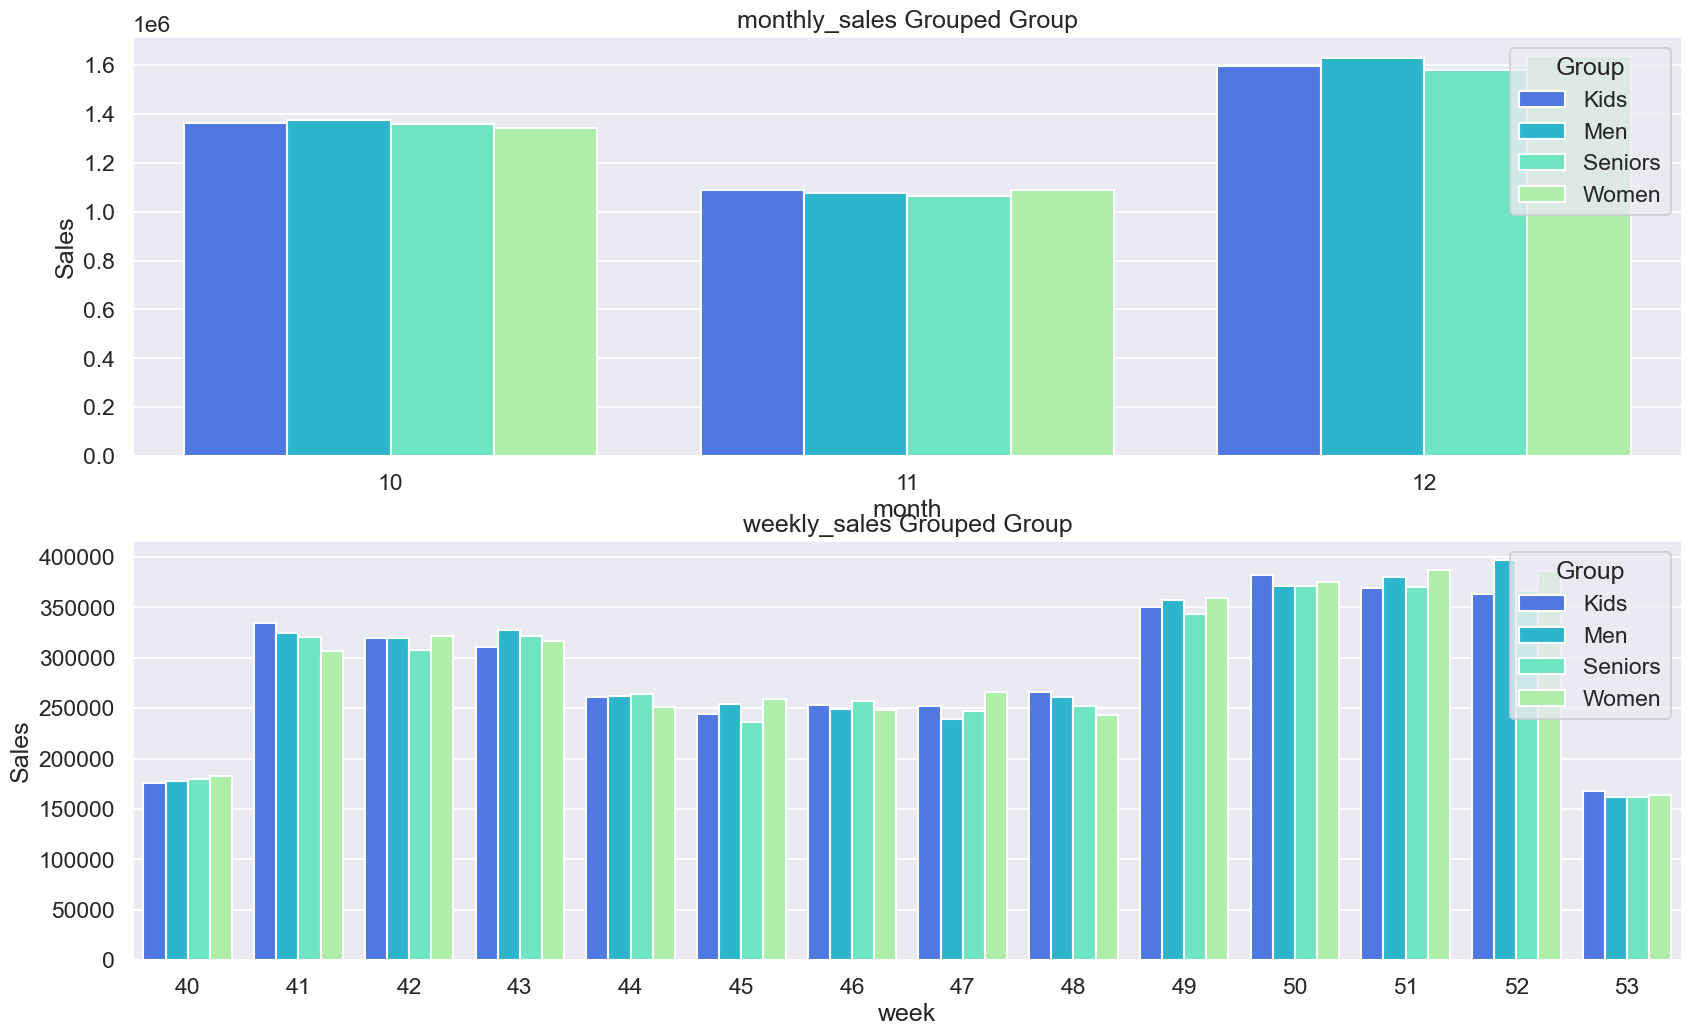

In [28]:
fig, (axs1,axs2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12), squeeze= True)
sns.barplot(monthly_sales, y="Sales", x="month", hue ='Group',   errorbar=None,  ax=axs1)
axs1.set_title("monthly_sales Grouped Group")

sns.barplot(weekly_sales, y="Sales", x="week",hue ='Group',  errorbar=None,   ax=axs2)
axs2.set_title("weekly_sales Grouped Group")

# Final Reports ---

In [29]:
monthly_sales_f = df.groupby(['month', 'Time', 'State', 'Group']).aggregate({"Sales":['sum','max','min' ]}).reset_index().reset_index()
weekly_sales_f = df.groupby(['week', 'Time', 'State', 'Group']).aggregate({"Sales":['sum','max','min' ]}).reset_index().reset_index()

monthly_sales_f.head()

C:\Users\rdas6\AppData\Local\Temp\ipykernel_8452\3997679884.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_f = df.groupby(['month', 'Time', 'State', 'Group']).aggregate({"Sales":['sum','max','min' ]}).reset_index().reset_index()
C:\Users\rdas6\AppData\Local\Temp\ipykernel_8452\3997679884.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_sales_f = df.groupby(['week', 'Time', 'State', 'Group']).aggregate({"Sales":['sum','max','min' ]}).reset_index().reset_index()


index month       Time State    Group    Sales               
                                             sum     max    min
0     0    10  Afternoon   NSW     Kids  2002500  100000  37500
1     1    10  Afternoon   NSW      Men  2050000   97500  40000
2     2    10  Afternoon   NSW  Seniors  1895000   97500  37500
3     3    10  Afternoon   NSW    Women  2255000  100000  37500
4     4    10  Afternoon    NT     Kids   712500   37500   7500

## 3. Data visualization

## Univariate Annalysis

In [30]:
df = (load_data(data_path)
      .pipe(convert_date, 'Date')
      .pipe(strip_column, 'Time')
      .pipe(strip_column, 'State')
      .pipe(strip_column, 'Group')
      .pipe(convert_to_category, 'Time')
      .pipe(convert_to_category, 'State')
      .pipe(convert_to_category, 'Group')
)

print(f'Data Shape {df.shape}')
print(df.info())

Data Shape (7560, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   category      
 2   State   7560 non-null   category      
 3   Group   7560 non-null   category      
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: category(3), datetime64[ns](1), int64(2)
memory usage: 200.1 KB
None


Text(0.5, 1.0, 'Group Count Plot')

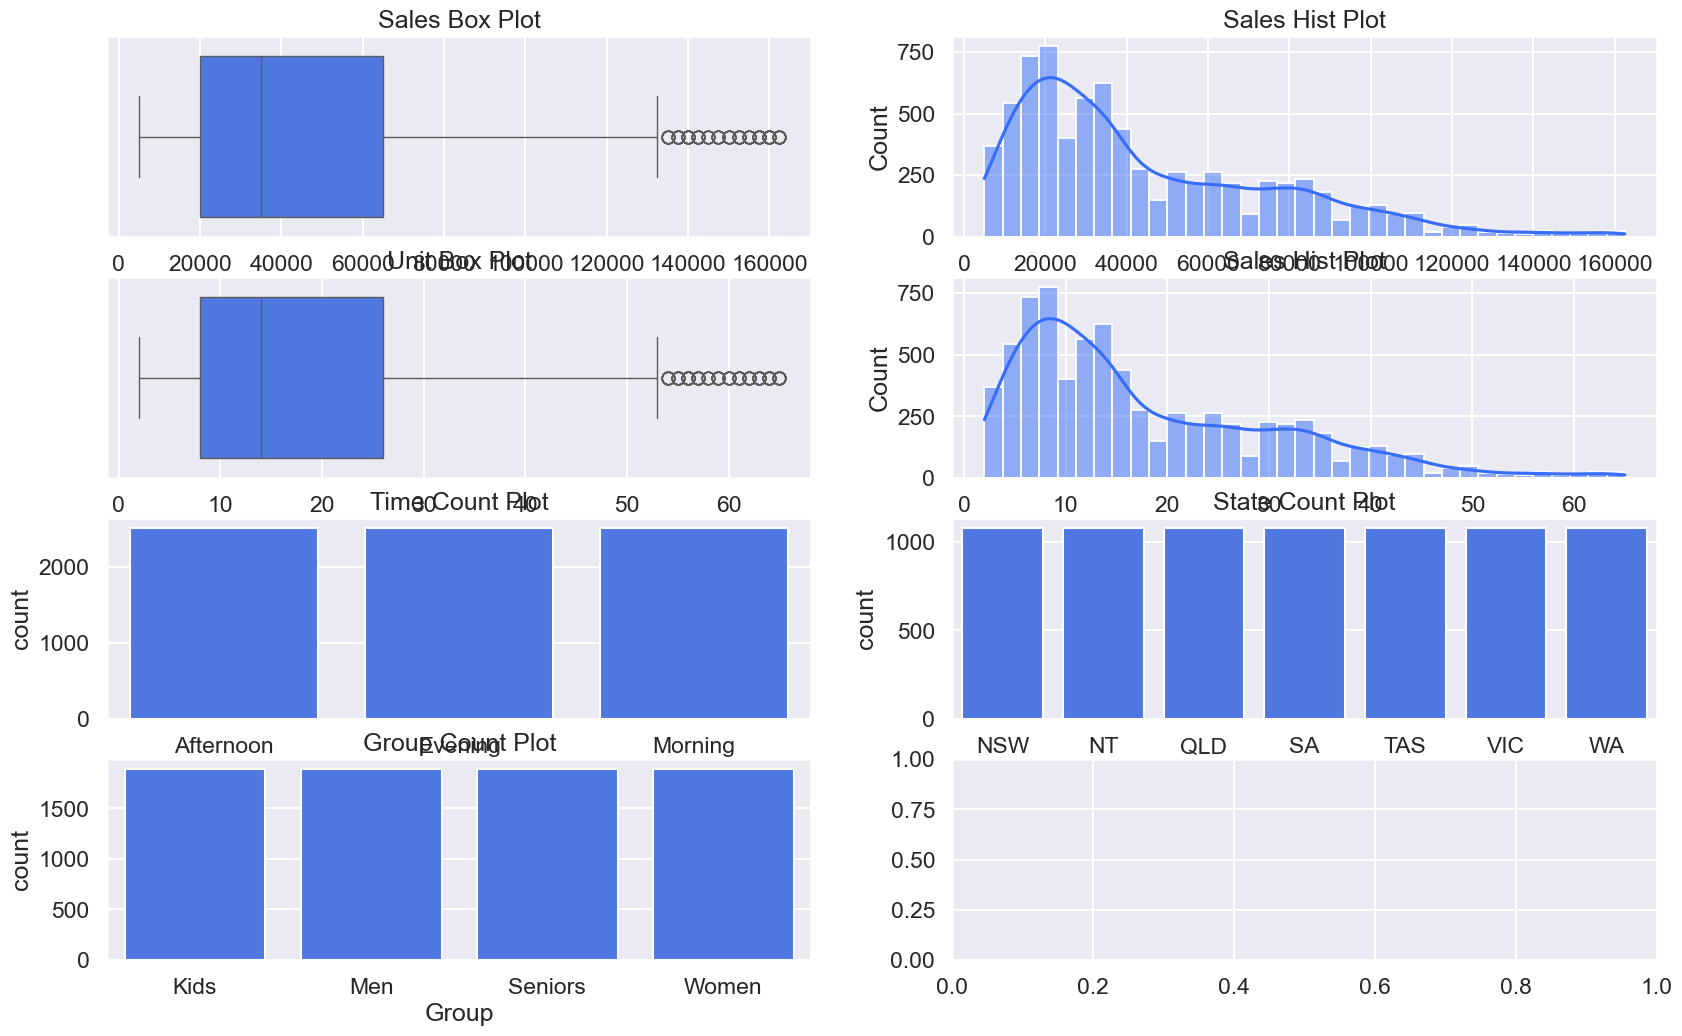

In [31]:
fig, (axs1,axs2, axs3, axs4) = plt.subplots(nrows=4, ncols=2, figsize=(20, 12))


sns.boxplot(df, x="Sales", ax=axs1[0])
axs1[0].set_title("Sales Box Plot")
sns.histplot(df, x="Sales", kde=True,ax=axs1[1])
axs1[1].set_title("Sales Hist Plot")

sns.boxplot(df, x="Unit", ax=axs2[0])
axs2[0].set_title("Unit Box Plot")
sns.histplot(df, x="Unit", kde=True,ax=axs2[1])
axs2[1].set_title("Sales Hist Plot")


sns.countplot(df, x="Time", ax=axs3 [0])
axs3[0].set_title("Time Count Plot")
sns.countplot(df, x="State", ax=axs3[1])
axs3[1].set_title("State Count Plot")

sns.countplot(df, x="Group", ax=axs4[0])
axs4[0].set_title("Group Count Plot")

#sns.scatterplot(df, x="Sales",y="Unit", ax=axs2[0])

# State-wise sales analysis for different demographic groups (kids, women, men, and seniors).
# Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.

<Axes: xlabel='Group', ylabel='Sales'>

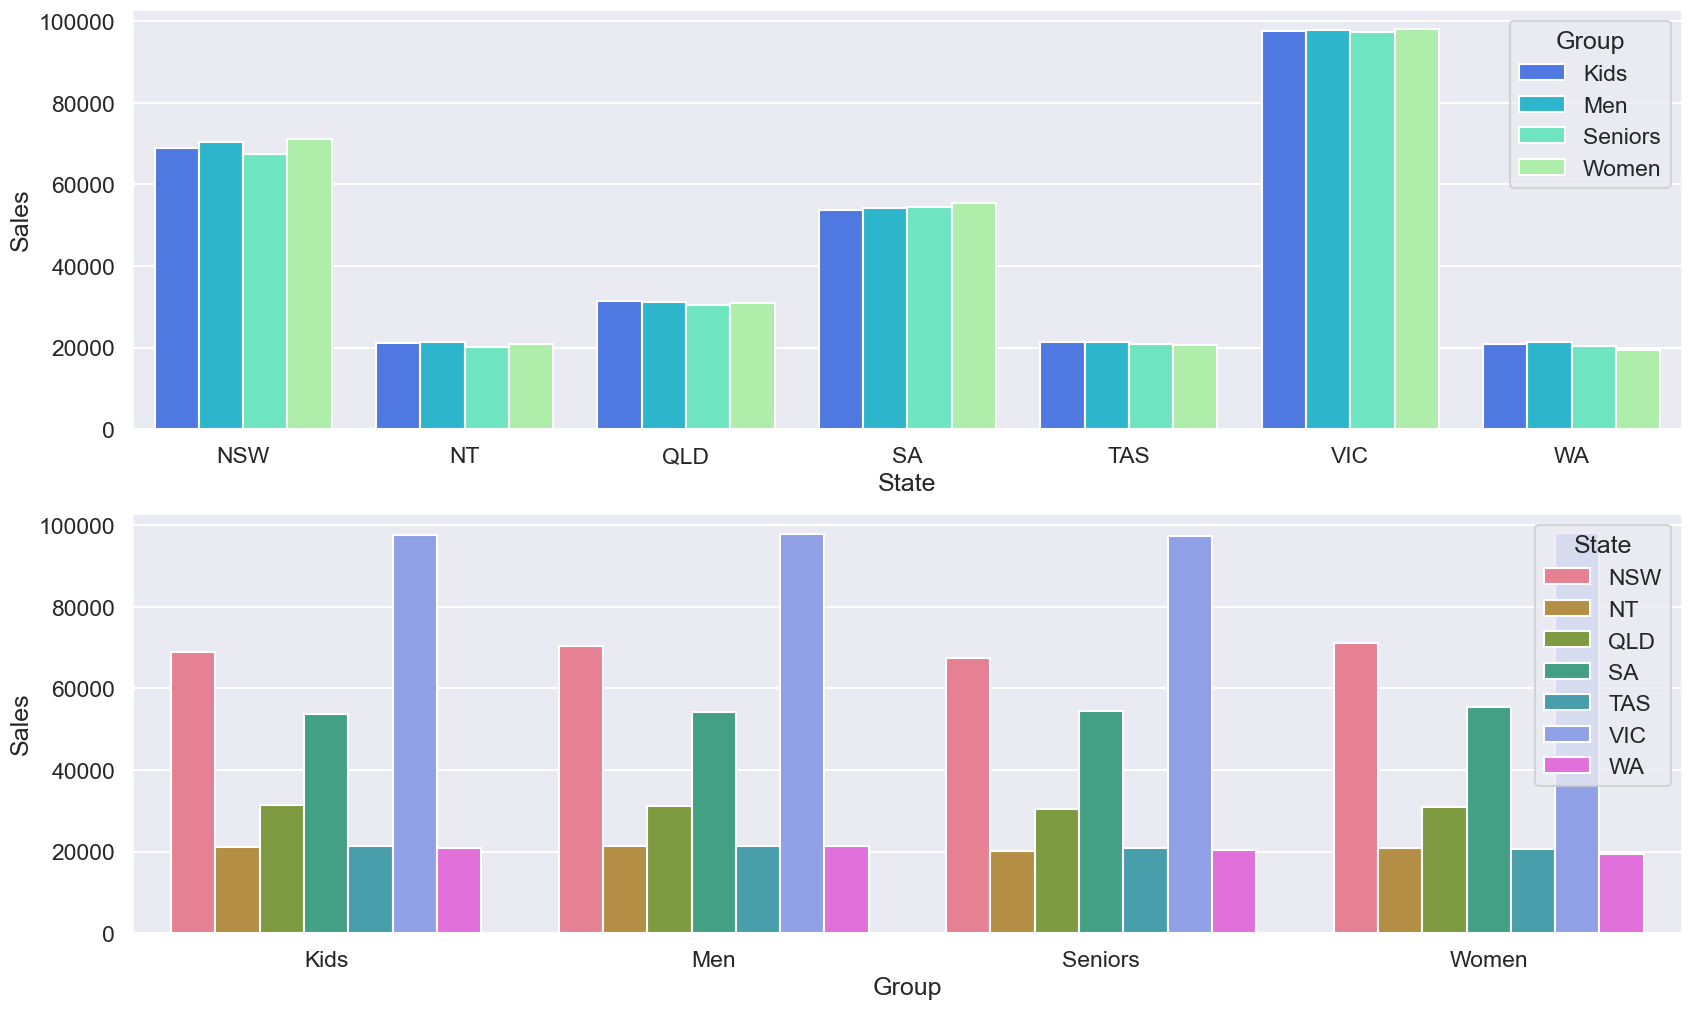

In [32]:
fig, (axs1,axs2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))
sns.barplot(df, y="Sales", x="State", hue ='Group', errorbar=None,  ax = axs1)

sns.barplot(df, y="Sales", x="Group", hue ='State', errorbar=None,  ax = axs2)

# Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.

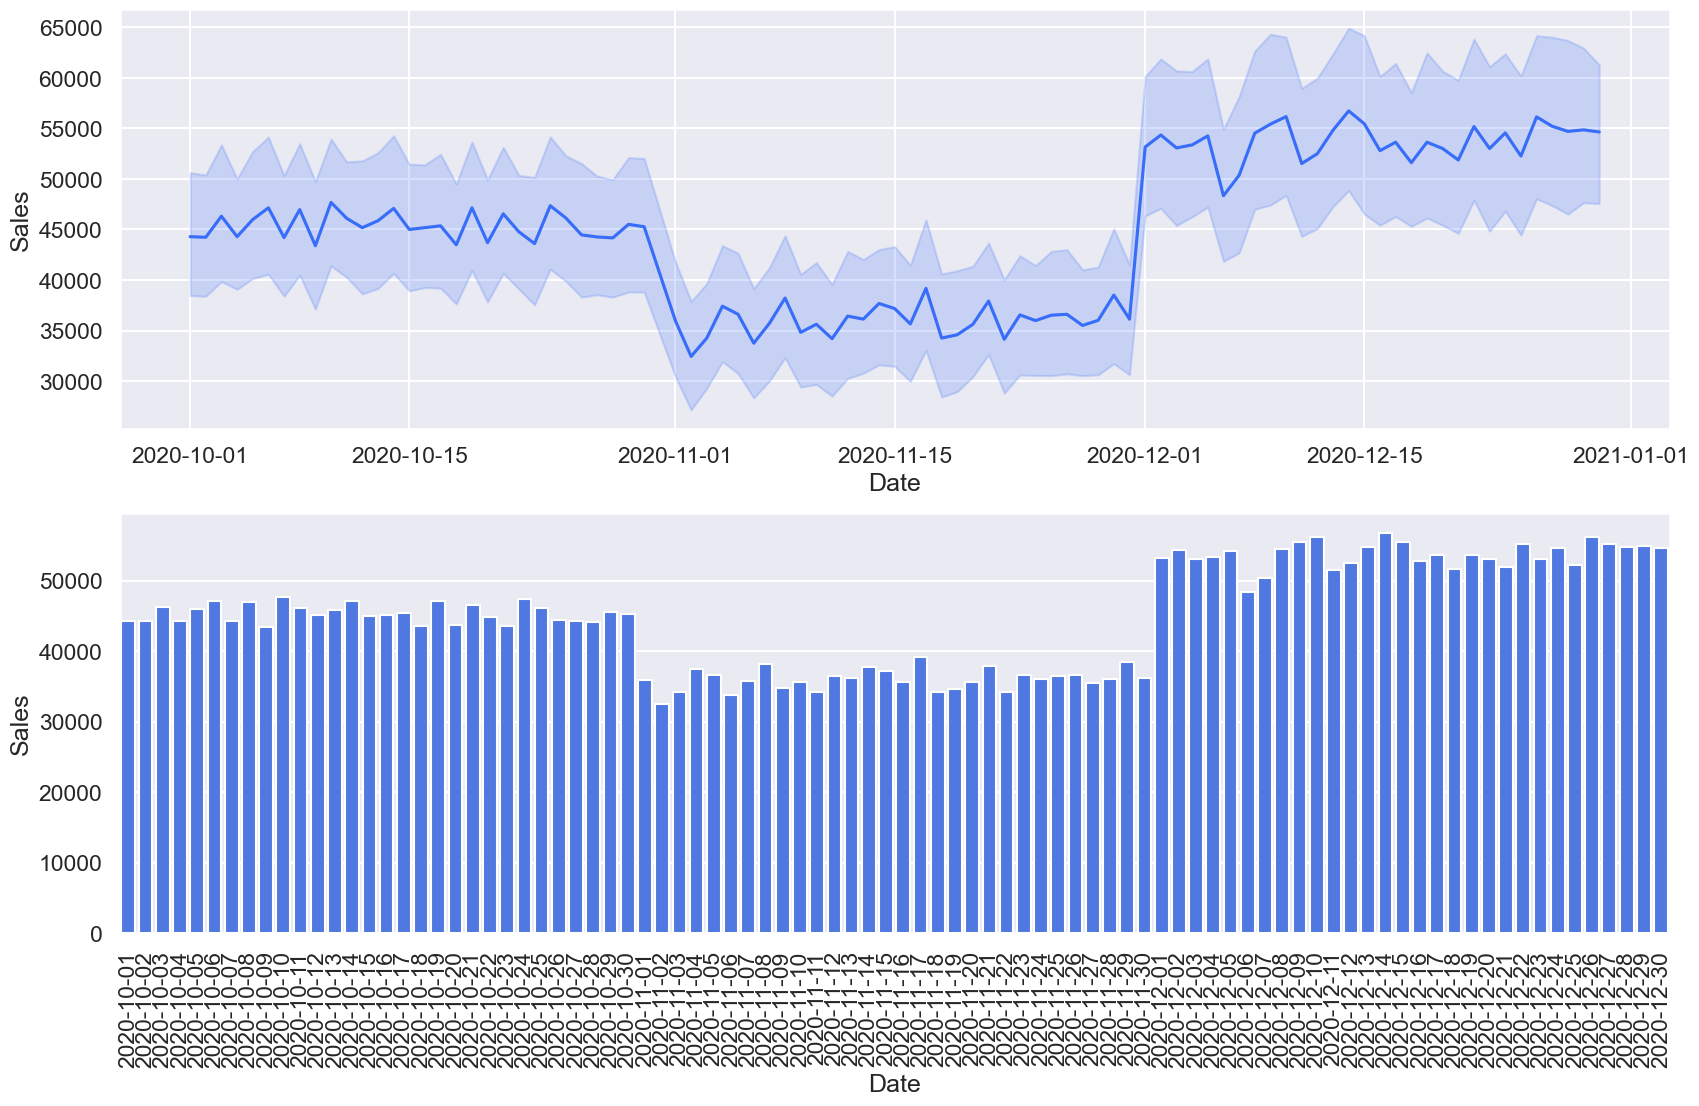

In [33]:
fig, (axs1,axs2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))
sns.lineplot(df, y="Sales", x="Date",  ax = axs1)

sns.barplot(df, y="Sales", x="Date", errorbar=None, ax = axs2)
axs2.tick_params(axis="x", rotation=90 , color ='gray')

# Report 

**Observation 1.** Sales and Units are positively correlated, with a correlation coefficient of *+1* This indicates the following:
* There were no promotional sales, free products, or gifts given.
* No product returns occurred from the customers' side.
* This presents a huge opportunity for increasing sales through targeted promotions, discounts, or special offers, as the correlation suggests untapped potential.

**Observation 2.** Weeks 51, 52, and 53, or the last month of the quarter, show the highest number of sales. This is the ideal time for promotional campaigns, as the stores experience the highest traffic.

**Observation 3.** Sales across the groups (Kids, Men, Women, and Seniors) are consistent across various weeks and months. However, Women's wear tends to have a larger number of categories compared to other groups. Therefore, a significant portion of promotions should be targeted at the Women's group across all states.

# Here are some insights and suggestions for the promotional strategy:

### **1. Sales Patterns by Group and State :**
   - **VIC, NSW, and SA** show significantly higher sales compared to other states, with VIC being the top performer across all groups.
   - Sales are consistent across groups (Kids, Men, Seniors, and Women), though **Women and Seniors** show slightly higher numbers across several states.
   - **TAS, NT, and WA** show lower sales figures across all groups, indicating potential for improvement through targeted marketing efforts.
   
   **Promotional Strategy:**
   - Focus **targeted promotions** in high-performing states like **VIC, NSW, and SA** during peak sales periods to capitalize on existing consumer behavior.
   - **Boost awareness** and offer incentives in low-sales regions (TAS, NT, and WA) by introducing localized campaigns, partnerships, or region-specific promotions.
   - Since **Women’s wear** shows strong sales, consider expanding **women-focused promotions** in states where the category is already performing well, particularly VIC and NSW.

### **2. Monthly and Weekly Sales by Time of Day :**
   - Sales are fairly consistent across **morning, afternoon, and evening** during the months of **October, November, and December**. However, the month of **December** (corresponding to peak sales during the holiday season) shows the highest numbers.
   - **Weeks 51, 52, and 53** (likely the last weeks of the year) display the **highest sales volumes** across all time periods, with a slight peak in the morning and evening.

   **Promotional Strategy:**
   - Focus major campaigns on the **last quarter (October to December)**, particularly in **Weeks 51 to 53**, aligning with the holiday season and increased foot traffic. Consider **pre-holiday promotions** to drive early interest.
   - Since sales are consistent across the **morning, afternoon, and evening**, time-based promotions (e.g., morning specials or evening discounts) can help to **balance traffic** and maintain momentum throughout the day.
   - Launch **flash sales** or **limited-time offers** in the morning and evening during these peak weeks to further boost engagement.

### **3. Group-Specific Promotions:**
   - Women’s wear exhibits more categories and slightly stronger sales in some states. A **dedicated promotional campaign for Women's wear** across high-performing states (VIC, NSW, and SA) could drive additional revenue.
   - **Men’s wear** also shows strong performance in VIC and NSW, so promotions for men's products could focus on **fashion essentials** or **new arrivals** in these regions.

### **Summary Promotional Strategy:**
   1. **Time your campaigns** to maximize sales during Weeks 51 to 53, leveraging the holiday season with special promotions.
   2. Implement **region-specific promotions**: Boost awareness in **low-performing regions (TAS, NT, WA)** and continue capitalizing on strong sales in **VIC, NSW, and SA**.
   3. Launch **time-specific flash sales** across **morning and evening** during peak sales weeks (Weeks 50 to 52) to maximize consumer engagement.
   4. Consider **category-focused promotions**, with a special emphasis on **Women’s wear** and **Men’s wear**, as they are key drivers across most regions.

Let me know if you'd like to dive deeper into any particular group or region for further insights!